## Codelab 17-05 - Sala Avançada

**Integrantes:** Augusto, Bruno, Gustavo, Henrique, João

### Segue a descrição das variáveis:

Age: idade em anos

BMI: índice de massa corporal (kg/m2)

Glucose: nível de glicose no sangue (mg/dL)

Insulin: nível de insulina no sangue (µU/mL)

HOMA: nível de resistência a insulina

Leptin: leptina (ng/mL)

Adiponectin: Adiponectina (µg/mL)

Resistin: Resistina (ng/mL)

MCP-1: nível de proteína MCP-1 (pg/dL)

Classification: é classificado como 1 sem câncer (grupo controle) e 2 com câncer (grupo paciente)

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [2]:
# aqui a gente cala a boca do pandas
# importa o filtro
from warnings import simplefilter
from pandas.core.common import SettingWithCopyWarning

# monta o filtro
simplefilter("ignore", category=SettingWithCopyWarning)

In [3]:
# imports para construir uma árvore de decisão
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [4]:
# silencio, o jovem tá fazendo função

# lembra daquele filtro lá no início? então, ele cala o pandas nessa célula aqui

def create_class_names(dataframe):
    """
    Função para criar os nomes das classes
    :param dataframe: um dataframe
    :return: um novo dataframe com os nomes das classes na coluna 'classification_name'
    """

    dataframe['classification_name'] = 0
    for classrow, classification in enumerate(dataframe['Classification']):
        if classification == 1:
            dataframe['classification_name'][classrow] = 'Sem Câncer'
        elif classification == 2:
            dataframe['classification_name'][classrow] = 'Com Câncer'

    return dataframe

In [5]:
# Importando os dados
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


### Agora a brincadeira começa

##### 1. Construa um modelo hierárquico, utilizando todas as variáveis disponíveis e separando em 2 clusters. Adicione a nova variável 'cluster' com o resultado ao conjunto de dados.

In [6]:
X = dataset.drop('Classification', axis=1)
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [7]:
X_std = StandardScaler().fit_transform(X)
X_std.shape

(116, 9)

In [26]:
modeloClusterHierarquico = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_pred = modeloClusterHierarquico.fit_predict(X_std)

Os gráficos abaixo foram feitos mas ninguém entendeu, é raro mas acontece muito.

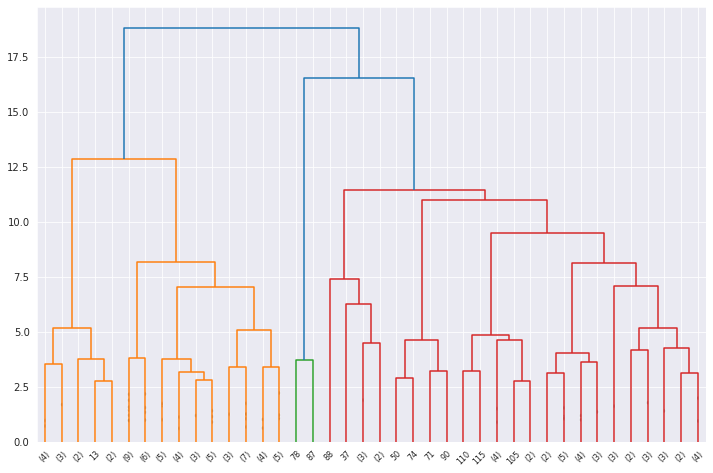

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize = [12,8])
ax = hierarchy.dendrogram(hierarchy.linkage(X_std, method='ward'),
                          truncate_mode = 'lastp', p = 40,
                          show_contracted = True)
plt.show()

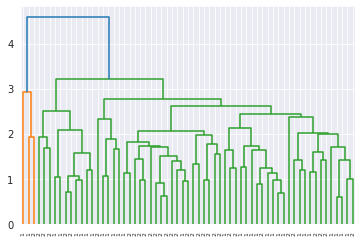

In [10]:
ax = hierarchy.dendrogram(hierarchy.linkage(X_std[y_pred==1], method='average'),  
                          labels=dataset[y_pred==1]['Classification'].tolist())

In [11]:
# Criando a nova feature 'cluster'
dataset['cluster'] = y_pred
dataset.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2,0
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2,1
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2,0
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2,1
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2,0


##### 2. Implemente uma árvore de decisão com o novo conjunto de dados onde a variável alvo será a variável 'cluster'

##### Modelo com Cluster 1

In [14]:
#preparando dados
dataset_cluster1 = dataset[dataset['cluster'] == 1]
X_1 = dataset_cluster1.drop(['Classification', 'cluster'], axis=1)
X_1std = StandardScaler().fit_transform(X_1)
y_1 = dataset_cluster1['Classification']

# dividindo o dataset em treino e teste
X_1train, X_1test, y_1train, y_1test = train_test_split(X_1, y_1, test_size = 0.2, random_state=10)

# Modelo com árvore cluster 1
arvore1 = DecisionTreeClassifier(random_state=10)
arvore1.fit(X_1train, y_1train)
y_1pred = arvore1.predict(X_1test)

##### 3. Quais foram os valores das métricas acurácia, precisão e sensitividade?


In [22]:
# Avaliando o modelo com cluster 1

print(f'Acurácia: {accuracy_score(y_1test, y_1pred):.2f}')
print(f'Precisão: {precision_score(y_1test, y_1pred, average="macro"):.2f}')
print(f'Sensibilidade (Recall): {recall_score(y_1test, y_1pred, average="macro"):.2f}')

Acurácia: 0.54
Precisão: 0.55
Sensibilidade (Recall): 0.55


##### 4. Gere a visualização dessa árvore. Esta árvore representa como a clusterização ocorreu, observe cada ramificação. Encontre o caso onde temos um paciente negativo e um positivo no cluster 1. Observando a visualização da árvore, quais foram as regras que as colocaram no mesmo cluster?

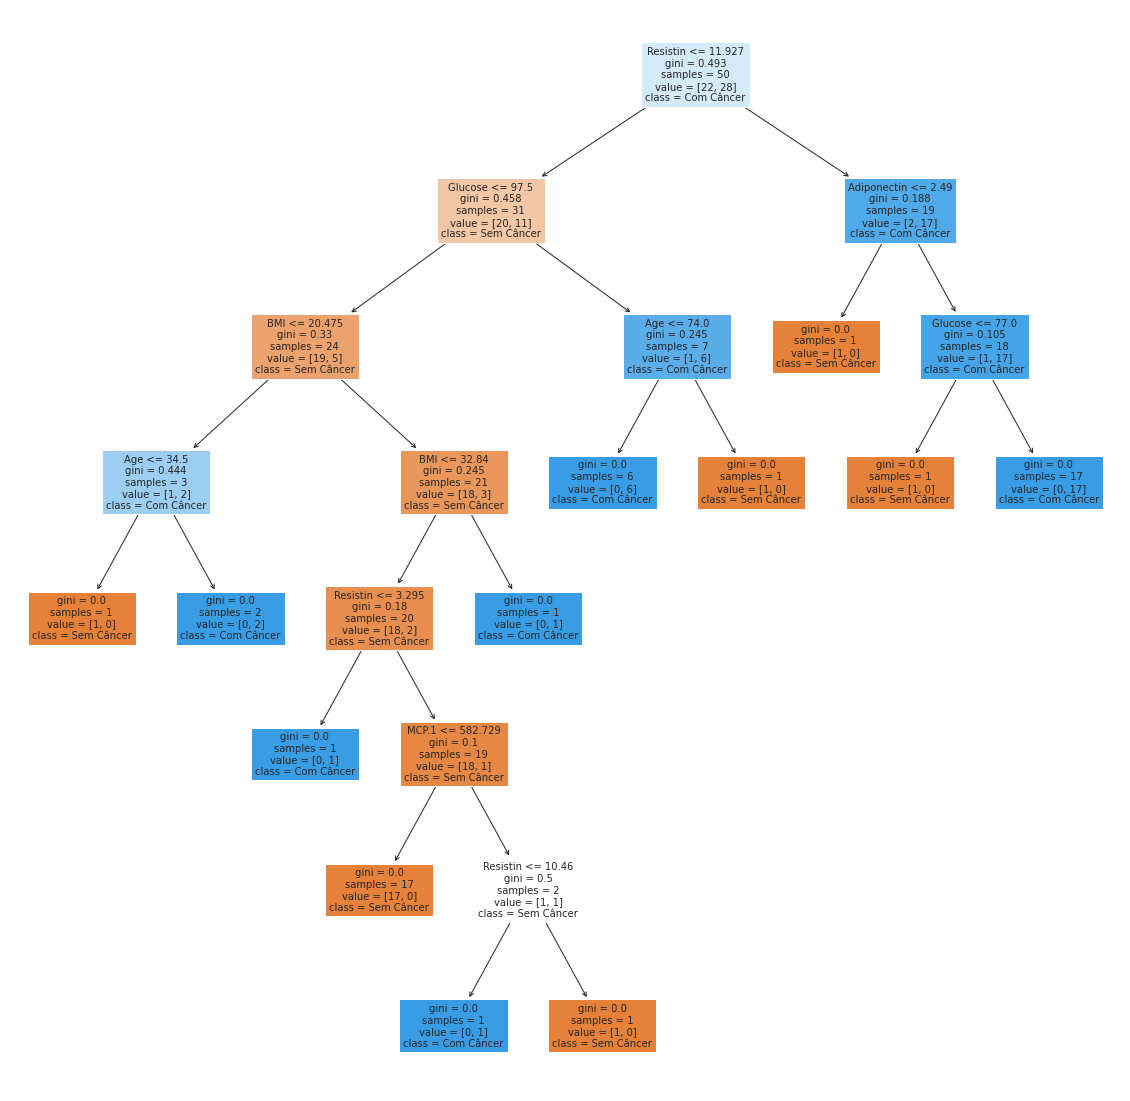

In [18]:
# dando nome às classes do target
dataset_cluster1 = create_class_names(dataset_cluster1)

# construindo gráfico da árvore 1
plt.figure(figsize = [20,20])
names = dataset_cluster1.columns.drop(['cluster']) # dropa a coluna cluster e depois passa os nomes de todas as colunas que são features para montar o gráfico
target_name = dataset_cluster1['classification_name'].unique() # nomes das classes que criamos usando a função 'create_class_names'
plot_tree(arvore1,filled=True, fontsize=10, class_names= target_name, feature_names= names) # pode usar ; pra calar a boca dos logs ao invés do plt.show()
plt.show()

##### Resposta:

A regra utilizada foi 'Resistin <= 10.46'

### Daqui para frente são as mesmas perguntas o segundo subset (cluster 0)

#### 2. Implemente uma árvore de decisão com o novo conjunto de dados onde a variável alvo será a variável 'cluster'

##### Modelo com Cluster 0

In [23]:
# Preparando os dados
dataset_cluster0 = dataset[dataset['cluster'] == 0]
X_0 = dataset_cluster0.drop(['Classification', 'cluster'], axis=1)
X_0std = StandardScaler().fit_transform(X_0)
y_0 = dataset_cluster0['Classification']

#Dividindo os dados em treino e teste
X_0train, X_0test, y_0train, y_0test = train_test_split(X_0, y_0, test_size = 0.2, random_state=10)

# Modelo 0
arvore0 = DecisionTreeClassifier(random_state=10)
arvore0.fit(X_0train, y_0train)
y_0pred = arvore0.predict(X_0test)

#### 3. Quais foram os valores das métricas acurácia, precisão e sensitividade?


In [24]:
# Avaliando o modelo com cluster 0

print(f'Acurácia: {accuracy_score(y_0test, y_0pred):.2f}')
print(f'Precisão: {precision_score(y_0test, y_0pred, average="macro"):.2f}')
print(f'Sensibilidade (Recall): {recall_score(y_0test, y_0pred, average="macro"):.2f}')

Acurácia: 0.73
Precisão: 0.72
Sensibilidade (Recall): 0.73


##### 4. Gere a visualização dessa árvore. Esta árvore representa como a clusterização ocorreu, observe cada ramificação. Encontre o caso onde temos um paciente negativo e um positivo no cluster 1. Observando a visualização da árvore, quais foram as regras que as colocaram no mesmo cluster?

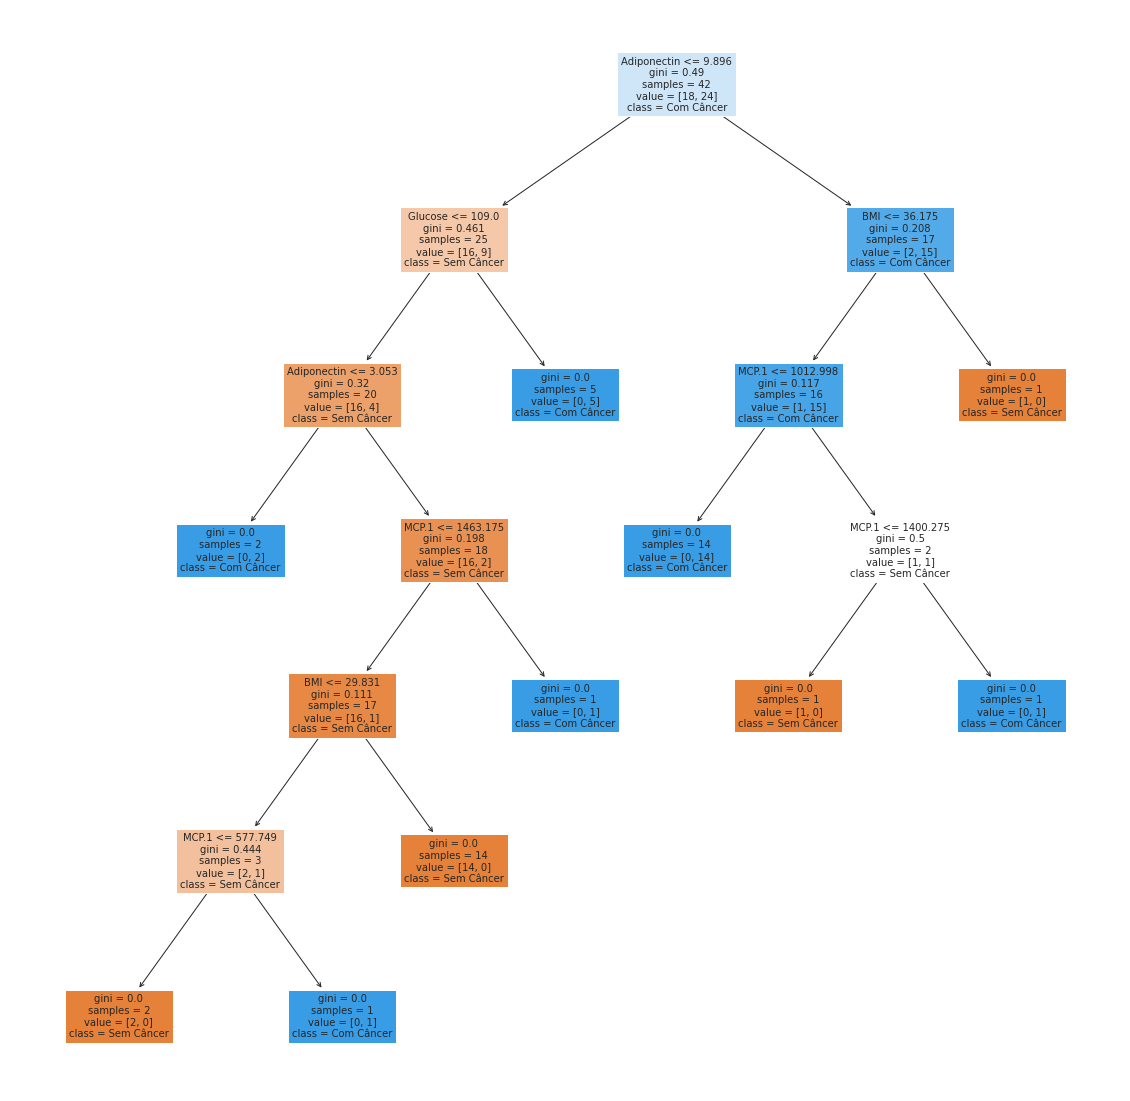

In [25]:
# dando nome às classes do target
dataset_cluster0 = create_class_names(dataset_cluster0)

# construindo gráfico da árvore 0
plt.figure(figsize = [20,20])
names = dataset_cluster0.columns.drop(['cluster']) # dropa a coluna cluster e depois passa os nomes de todas as colunas que são features para montar o gráfico
target_name = dataset_cluster0['classification_name'].unique() # nomes das classes que criamos usando a função 'create_class_names'
plot_tree(arvore0,filled=True, fontsize=10, class_names= target_name, feature_names= names) # pode usar ; pra calar a boca dos logs ao invés do plt.show()
plt.show()

##### Resposta:

A regra utilizada foi 'MCP.1 <= 1400.275'